# Seaborn

In [2]:
!conda install -y seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False #한글깨지지않게
rc("font", family="Malgun Gothic")
%matplotlib inline 
#주피터 노트북안에서 그림그리기위한 설정
#동일한 코드 : get_ipyton().run_line_magic("matplotlib", "inline")

## 예제1 : searborn 기초

In [4]:
x = np.linspace(0,14,100) # 0~14까지 100개로 나누어서 데이터 저장
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 2 * np.sin(x+1)
y4 = 2 * np.sin(x+1.5)

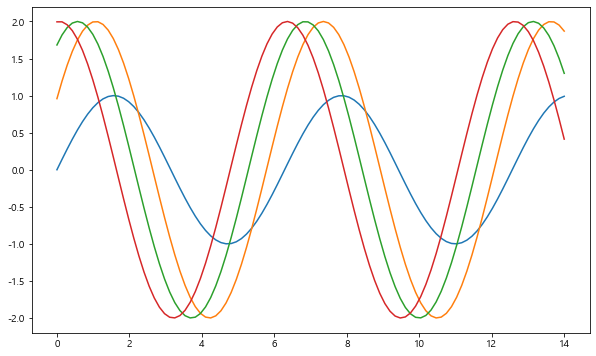

In [5]:
plt.figure(figsize=(10,6)) #plt 객체 생성
plt.plot(x,y1, x,y2, x,y3, x,y4) #실선그래프 #x축데이터, y축데이터
plt.show()

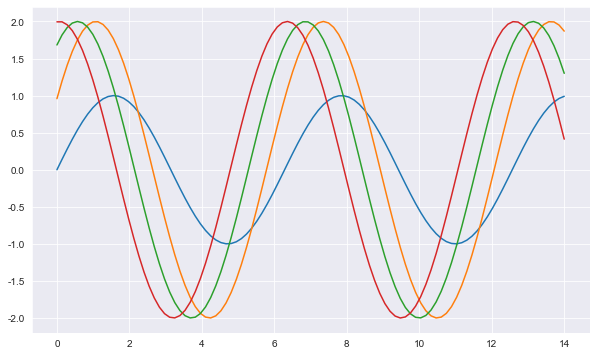

In [6]:
## sns.set_style

sns.set_style("darkgrid") #white / dark / whitegrid / darkgrid
plt.figure(figsize=(10,6)) #plt 객체 생성
plt.plot(x,y1, x,y2, x,y3, x,y4) #실선그래프 #x축데이터, y축데이터
plt.show()

## 예제 2 : searborn tips data
 - boxplot
 - swarmplot
 - lmplot

In [7]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


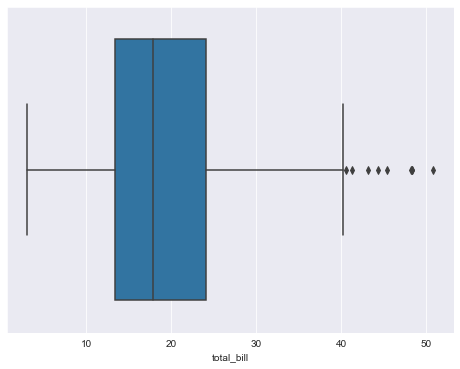

In [9]:
# boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=tips["total_bill"])
plt.show()

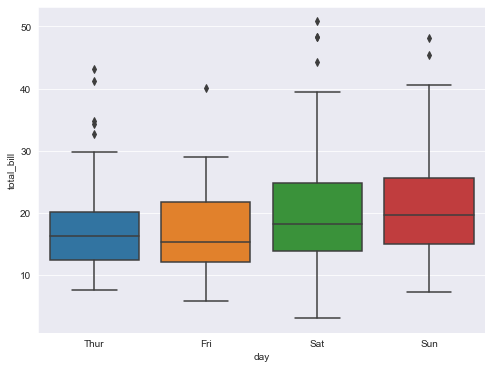

In [10]:
# boxplot
plt.figure(figsize=(8,6))
#sns.boxplot(x=tips["day"],y=tips["total_bill"])
sns.boxplot(x="day",y="total_bill", data=tips)
plt.show()

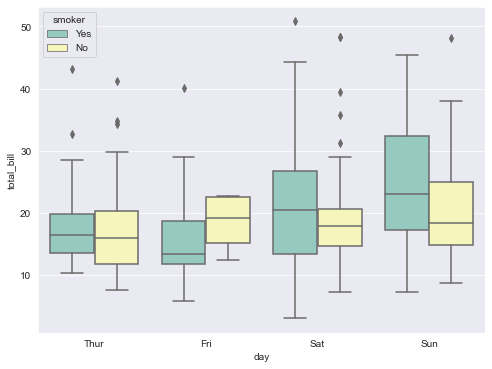

In [11]:
# boxplot 
# hue , palette 
plt.figure(figsize=(8,6))
sns.boxplot(x = "day", y="total_bill", data=tips, 
    hue="smoker", #hue : 카테고리형(yes|no)으로 되어있는 컬럼 값 이름을 넣으면... (matplotlib의 legend ) ##범례
    palette="Set3") #palette : Set 1 , 2 , 3 중 원하는 형태로 꾸며줌
plt.show()

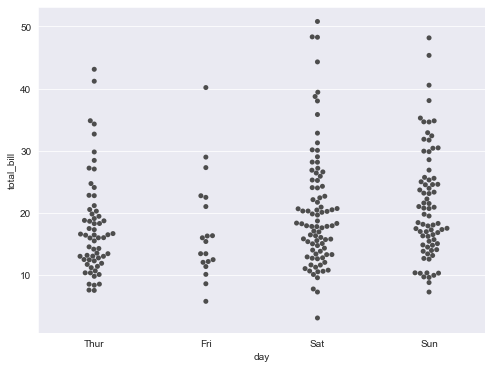

In [12]:
#swarmplot  ##산점도 형태
plt.figure(figsize=(8,6))
sns.swarmplot(x="day",y="total_bill", data=tips,
    color = "0.3", #색깔이 0(검) - 0.5(회색) - 1(흰) 사이값으로 설정가능 ##없으면 컬러값
    )
plt.show()

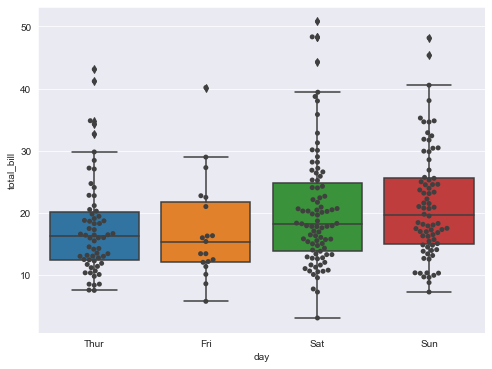

In [13]:
#boxplot + swarmplot
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
sns.swarmplot(x=tips["day"], y = tips["total_bill"], color="0.25")
plt.show()

In [14]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


C:\Users\82103\anaconda3\envs\ds_study\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


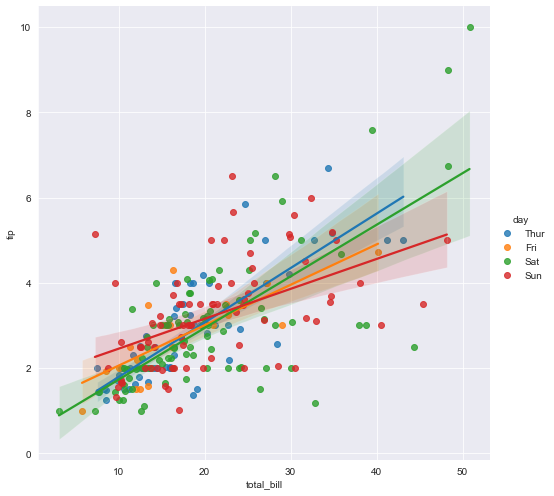

In [15]:
#lmplot : total_bill과 tip 사이의 관계 파악
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, #두데이터는 float형 데이터
        size = 7, #figsize랑 같은 역할  ## height로 수정해야 경고문구 안뜸
        hue = "day",        
)
sns.pairplot()

# 예제 3 : flights data
 - heatmap

In [16]:
flights = sns.load_dataset("flights")
flights.head(3) #year(int64) month(category) passengers(int64) 
#pivot
##index, columns, values
flights = flights.pivot(index="month", columns= "year",values="passengers") # index는 달... columns은 연도... values는 승객수...
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


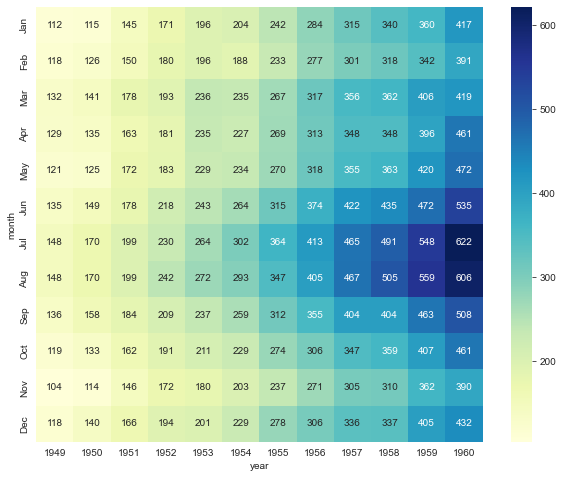

In [17]:
#headmap
plt.figure(figsize=(10,8))
sns.heatmap(
    data=flights,
    annot=True, #숫자를 표현할 것인가 
    fmt=  "d", # d : 정수형, f : 실수형
    cmap = "YlGnBu" #seaborn 에 색상 채우기
)
plt.show()

---

## 예제 4 : Iris data
- pairplot

In [18]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


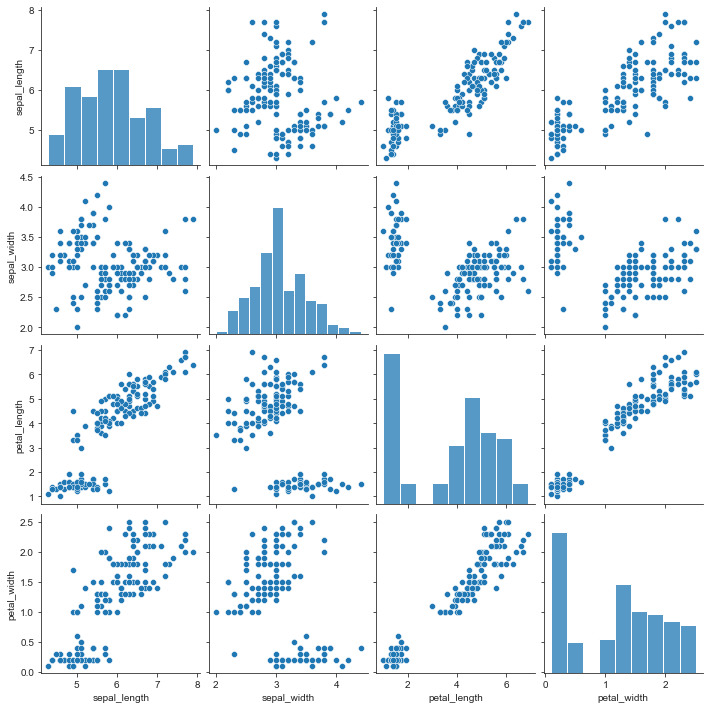

In [19]:
#pairplot
sns.set_style("ticks")
sns.pairplot(iris) #모든경우의 수
plt.show()

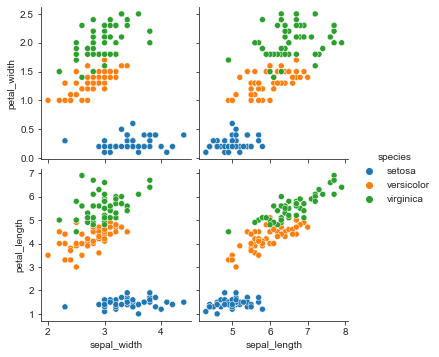

In [20]:
iris["species"].unique() # 'setosa' ,'versicolor' , 'virginica' 
sns.pairplot(
    iris,
    x_vars = ["sepal_width", "sepal_length"], #원하는 x,y컬럼만 선택해서 그림
    y_vars = ["petal_width","petal_length"],
    hue= "species" # 종류별로 색상을 다르게...
    )

## 예제 5 : anscombe data
- lmplot

In [21]:
anscombe = sns.load_dataset("anscombe")
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

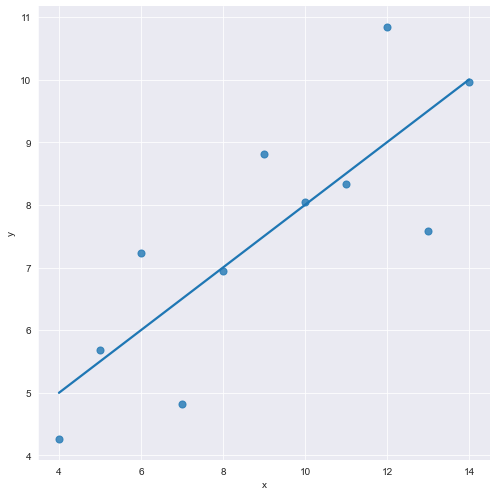

In [22]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'I'"), #dataset이 I인 행만 가져와서 데이터로 사용
    ci = None, # 신뢰구간을 선택 
    height = 7, # == size
    scatter_kws= {"s": 50}, # marker의 사이즈(s)를 50으로... 
    order = 1 #2차원
    )

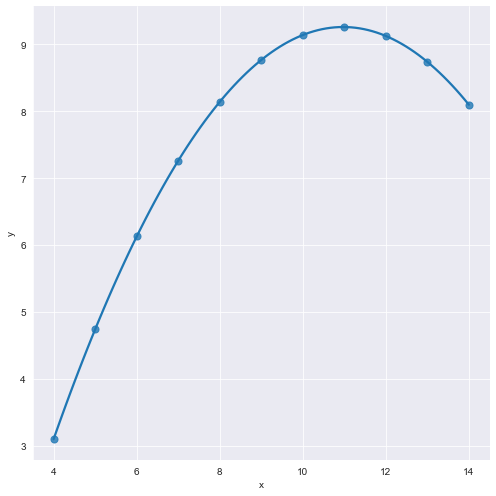

In [23]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'II'"), #dataset이 I인 행만 가져와서 데이터로 사용
    ci = None, # 신뢰구간을 선택 
    height = 7, # == size
    scatter_kws= {"s": 50}, # marker의 사이즈(s)를 50으로... 
    order = 2 #2차원
    )

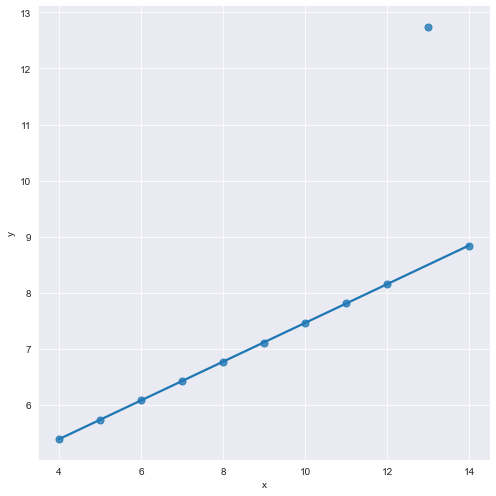

In [24]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x",
    y="y",
    data=anscombe.query("dataset == 'III'"), #dataset이 I인 행만 가져와서 데이터로 사용
    robust = True, #outlier 무시...
    ci = None, # 신뢰구간을 선택 
    height = 7, # == size
    scatter_kws= {"s": 50}, # marker의 사이즈(s)를 50으로... 
    )
plt.show()

---

# 8. 서울시 범죄현황 데이터 시각화

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
get_ipython().run_line_magic("matplotlib","inline")
rc("font",family="Malgun Gothic")

In [29]:
crime_anal_norm = pd.read_csv("../data/crime_anal_norm.csv", encoding="euc-kr")
crime_anal_norm.head()

,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
1,강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
2,강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569
3,강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255,911,0.565290,85.623335
4,관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929,2109,0.557578,78.710965


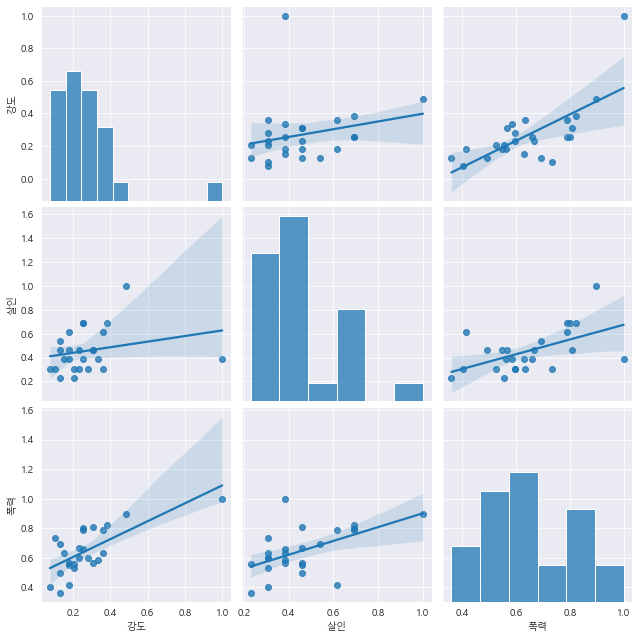

In [35]:
#pairplot ##강도,살인, 폭력에 대한 상관관계 확인
sns.pairplot(
    data = crime_anal_norm,
    vars=["강도","살인","폭력"],
    kind = "reg", #"reg" : 회귀분석  | "kde" : 지형도 | "scatter" : 산점도 | "hist" : 히트맵
    height = 3 #size
);

In [36]:
crime_anal_norm.head()

,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
1,강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
2,강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569
3,강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255,911,0.565290,85.623335
4,관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929,2109,0.557578,78.710965


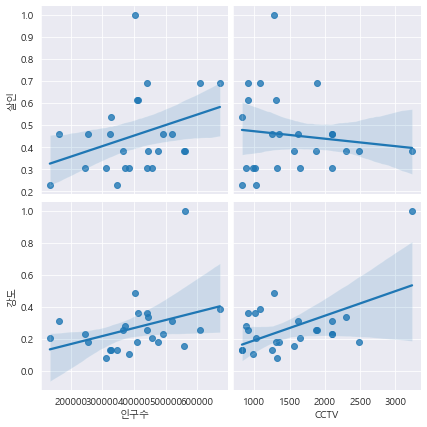

In [39]:
# 인구수, CCTV를 X축 살인, 강도를 Y축
def drawGraph():
    sns.pairplot(
        data = crime_anal_norm,
        x_vars= ["인구수","CCTV"],
        y_vars= ["살인","강도"],
        kind = "reg",
        height = 3
    )
drawGraph()

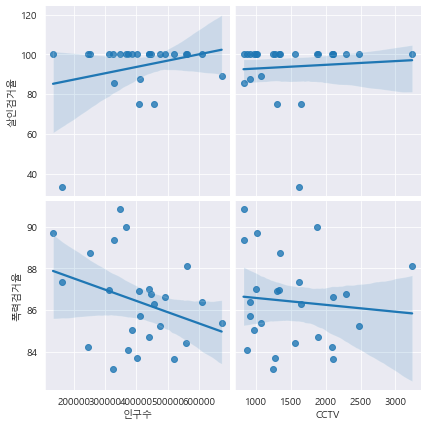

In [40]:
# x축 인구수, CCTV Y축 : "살인검거율", "폭력검거율"의 상관관계
def drawGraph():
    sns.pairplot(
        data = crime_anal_norm,
        x_vars= ["인구수","CCTV"],
        y_vars= ["살인검거율","폭력검거율"],
        kind = "reg",
        height = 3
    )
drawGraph()

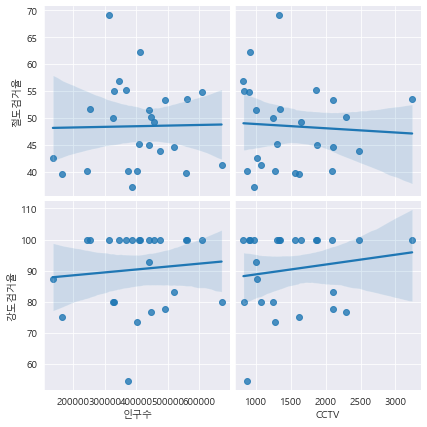

In [41]:
# "인구수" "CCTV" 와 "절도검거율" , "강도검거율"
def drawGraph():
    sns.pairplot(
        data = crime_anal_norm,
        x_vars= ["인구수","CCTV"],
        y_vars= ["절도검거율" , "강도검거율"],
        kind = "reg",
        height = 3
    )
drawGraph()

In [42]:
crime_anal_norm.head(3)

,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
1,강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
2,강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569


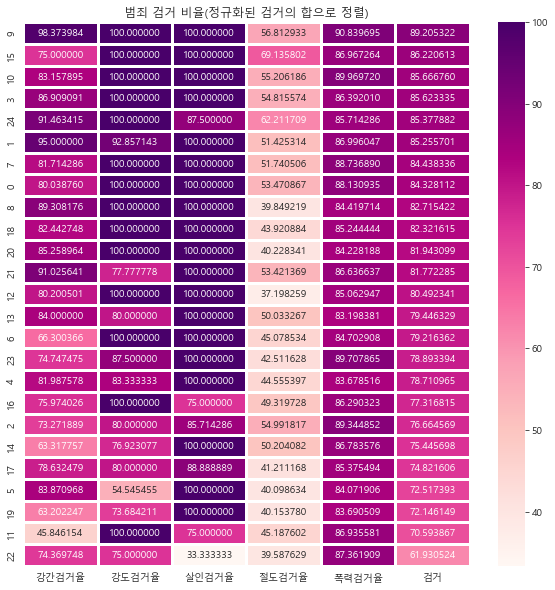

In [49]:

# 검거율에 대한 heatmap
# "검거" 컬럼을 기준으로 정렬
def drawGraph():
    # heatmap 그릴 데이터 프레임 생성
    taget_col = ["강간검거율","강도검거율","살인검거율","절도검거율","폭력검거율","검거"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False ) #내림차순
    # 그래프 설정
    plt.figure(figsize=(10,10))
    sns.heatmap(
        data=crime_anal_norm_sort[taget_col], # 선택한 컬럼만 가져와서 사용
        annot = True, #데이터값 보이게 설정
        fmt = "f", #실수형으로 표현
        linewidths  = 3, #박스간 간격설정 default = 0
        cmap = "RdPu", #
    )
    plt.title("범죄 검거 비율(정규화된 검거의 합으로 정렬)") #제목설정
    plt.show()
drawGraph()

In [50]:
crime_anal_norm.head(3)

,구별,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
1,강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
2,강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569


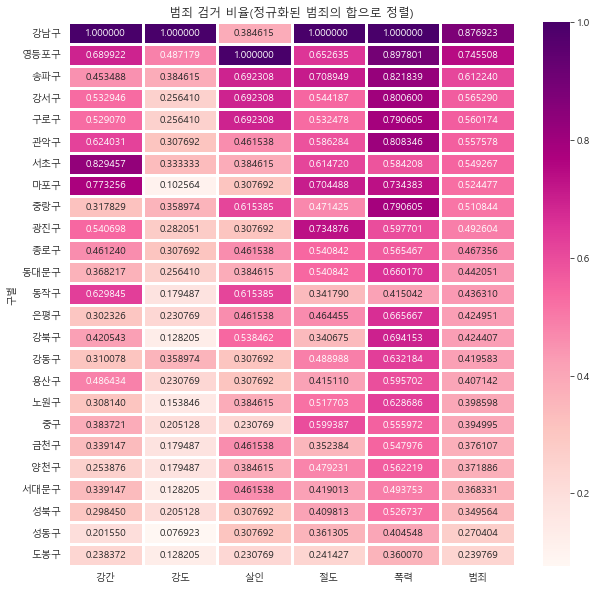

In [58]:
#범죄 발생 건수를 heatmap으로 표현
#'범죄' 컬럼을 기준으로 정렬
crime_anal_norm = crime_anal_norm.set_index("구별")
def drawGraph():
    target_col = taget_col = ["강간","강도","살인","절도","폭력","범죄"]
    crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)

    plt.figure(figsize=(10,10))
    sns.heatmap(
        data = crime_anal_norm_sort[target_col], 
        annot = True,
        fmt = "f",
        linewidths= 3,
        cmap= "RdPu"
    )
    plt.title("범죄 검거 비율(정규화된 범죄의 합으로 정렬)")
    plt.show()
drawGraph()

In [59]:
# 데이터 저장
crime_anal_norm.to_csv("../data/02. crime_in_Seoul_final.csv", sep="," , encoding="utf-8")